<a href="https://colab.research.google.com/github/valusio/pembelajaran-mesin-PoalcaValusio-2211533006/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [2]:
# Load dataset
train_df = pd.read_csv('train.csv')

# Lihat beberapa data
train_df.head()

# Preprocessing data
# Drop kolom yang tidak diperlukan
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Isi nilai yang hilang
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Encode fitur kategorikal
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Pisahkan fitur dan label
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Bagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Buat dan latih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi menggunakan model
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix:
[[136  21]
 [ 30  81]]


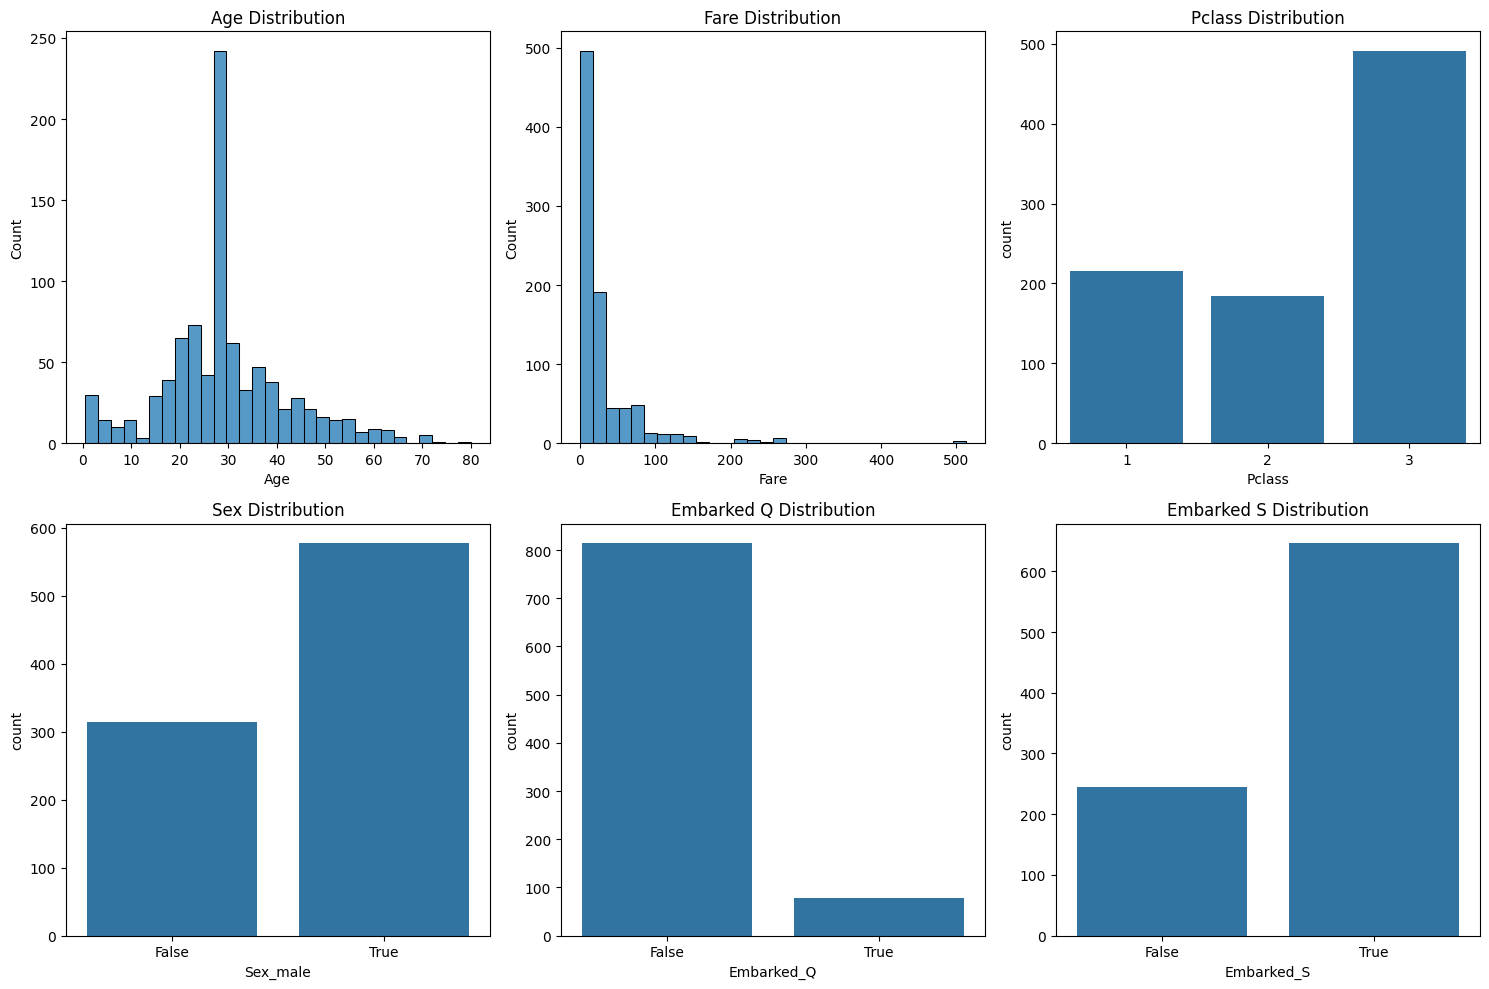

In [12]:
# Fungsi untuk menampilkan distribusi fitur
def plot_feature_distributions(df):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    sns.histplot(df['Age'], bins=30, kde=False, ax=axes[0, 0])
    axes[0, 0].set_title('Age Distribution')

    sns.histplot(df['Fare'], bins=30, kde=False, ax=axes[0, 1])
    axes[0, 1].set_title('Fare Distribution')

    sns.countplot(x='Pclass', data=df, ax=axes[0, 2])
    axes[0, 2].set_title('Pclass Distribution')

    sns.countplot(x='Sex_male', data=df, ax=axes[1, 0])
    axes[1, 0].set_title('Sex Distribution')

    sns.countplot(x='Embarked_Q', data=df, ax=axes[1, 1])
    axes[1, 1].set_title('Embarked Q Distribution')

    sns.countplot(x='Embarked_S', data=df, ax=axes[1, 2])
    axes[1, 2].set_title('Embarked S Distribution')

    plt.tight_layout()
    plt.show()

    # Plot distribusi fitur
plot_feature_distributions(train_df)


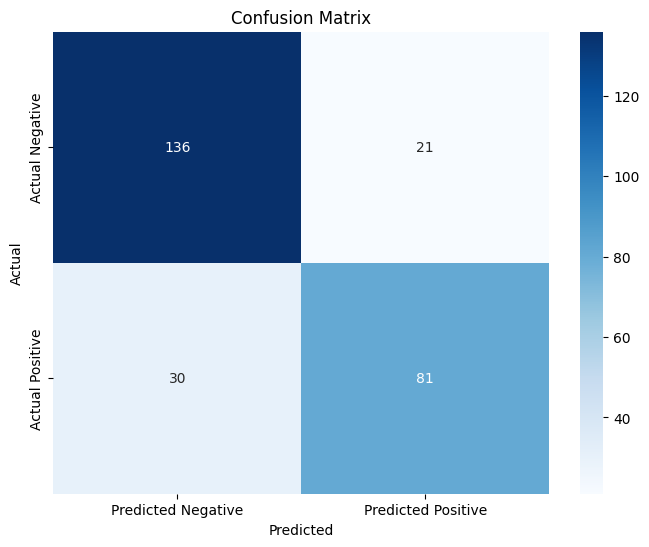

In [13]:
# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

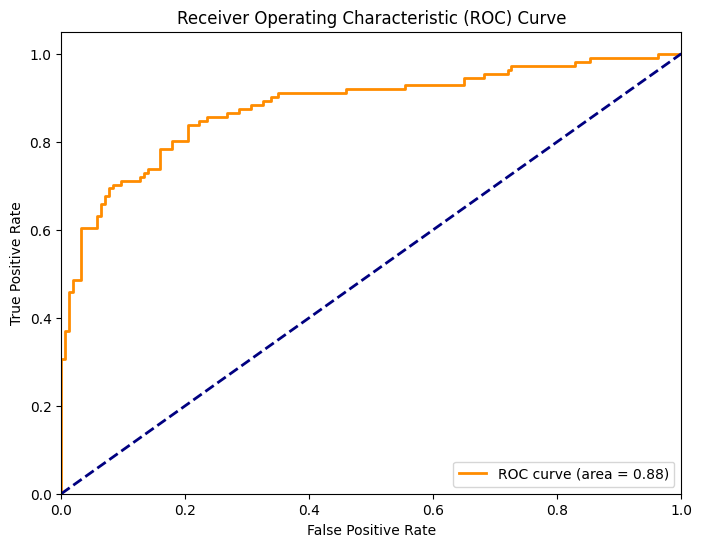

In [14]:
# Fungsi untuk menampilkan ROC Curve
def plot_roc_curve(y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_proba)